<a href="https://colab.research.google.com/github/efemeryczny/banking_network_analysis/blob/main/directors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
excel_file_path = '/content/drive/MyDrive/Colab Notebooks/Google_drive/dyrektorzy.xlsx'
data = pd.read_excel(excel_file_path)
data

,Company,Director,Ticker
0,POLSKI KONCERN NAFTOWY ORLEN SA.,Daniel Obajtek,PKN
1,POLSKI KONCERN NAFTOWY ORLEN SA.,Wojciech Jasinski,PKN
2,POLSKI KONCERN NAFTOWY ORLEN SA.,Andrzej Szumanski,PKN
3,POLSKI KONCERN NAFTOWY ORLEN SA.,Kazimiera Janina Goss,PKN
4,POLSKI KONCERN NAFTOWY ORLEN SA.,Barbara Jarzembowska,PKN
...,...,...,...
6653,MILKILAND N.V.,Pavlo Mykhaylovych Sheremeta,MLK
6654,MILKILAND N.V.,Vitaliy Strukov,MLK
6655,MILKILAND N.V.,Willem Scato van Walt Meijer,MLK
6656,MILKILAND N.V.,Pavlo Igorovych Yokhym,MLK


In [12]:
# Create a directed graph
G = nx.DiGraph()

# Iterate through the data and add nodes and edges to the graph
for _, row in data.iterrows():
    company = row['Company']
    director = row['Director']
    G.add_node(company)
    G.add_node(director)
    G.add_edge(director, company)

# Print some basic information about the network
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 6069
Number of edges: 6658


Graph density: 0.00018079277932430096


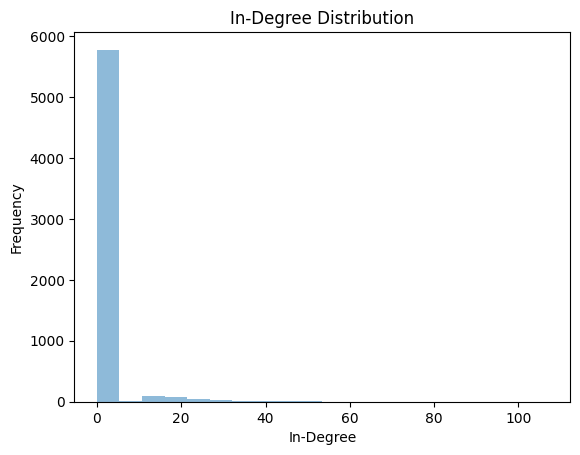

                          Director  Number of Edges
0                   Daniel Obajtek                2
1                Wojciech Jasinski                2
2                Andrzej Szumanski                2
3            Kazimiera Janina Goss                3
4             Barbara Jarzembowska                1
...                            ...              ...
5769  Pavlo Mykhaylovych Sheremeta                1
5770               Vitaliy Strukov                1
5771  Willem Scato van Walt Meijer                1
5772        Pavlo Igorovych Yokhym                1
5773            Anatoliy Yurkevych                1

[5774 rows x 2 columns]


In [18]:
# Calculate the density of the graph
density = nx.density(G)
print("Graph density:", density)

# Calculate and plot the degree distribution
degree_sequence = [d for n, d in G.in_degree()]  # You can also use out_degree for out-degrees
plt.hist(degree_sequence, bins=20, alpha=0.5)
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.title('In-Degree Distribution')
plt.show()

# Visualize the graph
#pos = nx.spring_layout(G, seed=42)  # You can choose a layout algorithm that suits your needs
#nx.draw(G, pos, with_labels=False, node_size=50, font_size=8)
#plt.title('Directed Graph')
#plt.show()

# Create a dictionary to store director names and their corresponding in-degrees (number of edges)
directors_info = {'Director': [], 'Number of Edges': []}

# Iterate through the nodes in the graph
for node in G.nodes():
    out_degree = G.out_degree(node)

    # Check if the node represents a director (you may need to adapt this based on your data)
    if out_degree > 0:
        directors_info['Director'].append(node)
        directors_info['Number of Edges'].append(out_degree)

# Create a DataFrame from the directors_info dictionary
directors_df = pd.DataFrame(directors_info)

# Display the directors and their number of edges
print(directors_df)

In [17]:
# Create a dictionary to store director names and their corresponding out-degrees (number of out-edges)
directors_info = {'Director': [], 'Number of Out-Edges': []}

# Iterate through the nodes in the graph
for node in G.nodes():
    out_degree = G.out_degree(node)

    # Check if the node represents a director and has more than one out-edge
    if out_degree > 1:
        directors_info['Director'].append(node)
        directors_info['Number of Out-Edges'].append(out_degree)

# Create a DataFrame from the directors_info dictionary
directors_df = pd.DataFrame(directors_info)

# Sort the DataFrame in ascending order based on the number of out-edges
directors_df = directors_df.sort_values(by='Number of Out-Edges', ascending=True)

# Print directors with more than one out-edge
print(directors_df)

                            Director  Number of Out-Edges
0                     Daniel Obajtek                    2
379                   Grzegorz Janas                    2
378                     Piotr Gawrys                    2
377               Maciej Jakub Nowak                    2
376         Piotr Mikolaj Wisniewski                    2
..                               ...                  ...
141                       Zofia Dzik                    7
183            Piotr Maciej Kaminski                    7
118                  Maciej Matusiak                    8
172               Tadeusz Wesolowski                    8
247  Krzysztof Stanislaw Kaczmarczyk                   12

[596 rows x 2 columns]


In [4]:
# Assuming you have a DataFrame named 'data' with columns 'Company', 'Director Name', and 'Ticker'

# Define the list of bank tickers
bank_tickers = ['PKO', 'SPL', 'PEO', 'MBK', 'ING', 'BNP', 'ALR', 'MIL', 'BHW', 'BOS', 'GTN']

# Filter the DataFrame to include only rows with tickers from the list
filtered_data = data[data['Ticker'].isin(bank_tickers)]

# Extract unique director names from the filtered data
director_names = filtered_data['Director'].unique()

# Sort the director names if needed
director_names.sort()

# Print the sorted director names
for director in director_names:
    print(director)

Achim Kassow
Adam Aleksander Wojtas
Adam Budnikowski
Adam Grzegorz Wasiak
Adam Maciejewski
Adam Marciniak
Adam Pers
Adam Zbigniew Grzebieluch
Adnaan Omar Ahmed
Adrianus Johannes Antonius Kas
Agata Rowinska
Agata Strzelecka
Agnieszka Graczyk
Agnieszka Halina Zawartko
Agnieszka Hryniewicz Bieniek
Agnieszka Irena Nogajczyk-Simeonow
Agnieszka Izabela Winnik-Kalemba
Agnieszka Jadczyszyn
Agnieszka Konarzewska Wlodarczyk
Agnieszka Slomka Golebiowska
Agnieszka Wolska
Aguirre Juan De Porras
Alain Carmelo Van Groenendael
Aleksander Galos
Aleksander Gosk
Aleksander Kompf
Aleksander Korszalowski
Aleksander Kutela
Aleksandra Agatowska
Aleksandra Buczkowska
Aleksandra Gren
Aleksandra Swiderska
Alessandro Maria Decio
Alicja Kornasiewicz
Alicja Zyla
Alojzy Nowak
Anand Selvakesari
Andras Reiniger
Andre Camille Henri Joseph Boulanger
Andre Carls
Andreas Boeger
Andrzeij Maria Herman
Andrzej Blazejewski
Andrzej Burliga
Andrzej Glinski
Andrzej Grzegorz Matysiak
Andrzej Kazimierz Kraszewski
Andrzej Kisielew

In [6]:
# Create a directed graph
G = nx.DiGraph()

# Iterate through the data and add nodes and edges to the graph
for _, row in data.iterrows():
    company = row['Company']
    director = row['Director']

    # Add nodes for company and director if they don't already exist
    G.add_node(company)
    G.add_node(director)

    # Add an edge to represent the relationship (director -> company)
    G.add_edge(director, company)

# Print some basic information about the network
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


Number of nodes: 6069
Number of edges: 6658


In [8]:
# Create a dictionary to store director names and their corresponding out-degrees (number of out-edges)
out_degrees = {}

# Iterate through the director names in the list
for director in director_names:
    # Check if the director is a node in the graph
    if director in G.nodes():
        out_degree = G.out_degree(director)
        out_degrees[director] = out_degree

# Sort the dictionary by out-degrees in descending order
sorted_out_degrees = dict(sorted(out_degrees.items(), key=lambda item: item[1], reverse=True))

# Print out-degrees for directors in descending order
for director, out_degree in sorted_out_degrees.items():
    print(f"{director}: Out-degree = {out_degree}")

Zofia Dzik: Out-degree = 7
Artur Kucharski: Out-degree = 6
Dariusz Daniluk: Out-degree = 6
Piotr Kaczmarek: Out-degree = 6
Filip Gorczyca: Out-degree = 5
Pawel Straczynski: Out-degree = 5
Jacek Gdanski: Out-degree = 4
Katarzyna Beuch: Out-degree = 4
Marcin Eckert: Out-degree = 4
Marek Wierzbowski: Out-degree = 4
Mariusz Cezary Grendowicz: Out-degree = 4
Agnieszka Slomka Golebiowska: Out-degree = 3
Aleksander Galos: Out-degree = 3
Beata Stelmach: Out-degree = 3
Danuta Dabrowska: Out-degree = 3
Debbie Shotwell: Out-degree = 3
Dominik Kaczmarski: Out-degree = 3
Dr Wojciech Piotr Wardacki: Out-degree = 3
Iwona Duda: Out-degree = 3
Jody Bailey: Out-degree = 3
Kazimiera Janina Goss: Out-degree = 3
Khalid El Khatib: Out-degree = 3
Krzysztof Kozlowski: Out-degree = 3
Marek Rocki: Out-degree = 3
Marek oczkowski: Out-degree = 3
Matthew Gallatin: Out-degree = 3
Miroslaw Barszcz: Out-degree = 3
Miroslaw Godlewski: Out-degree = 3
Prashanth Chandrasekar: Out-degree = 3
Rafal Marek Kozlowski: Out-deg

In [9]:
# Print out-degrees for directors in descending order
for director, out_degree in sorted_out_degrees.items():
    print(f"{director}: Out-degree = {out_degree}")

    # Get neighboring companies for the current director
    neighboring_companies = list(G.successors(director))

    # Print the companies associated with this director
    print("Companies:")
    for company in neighboring_companies:
        print(f"- {company}")
    print("\n")

Zofia Dzik: Out-degree = 7
Companies:
- POWSZECHNA KASA OSZCZEDNOSCI BANK POLSKI SA - PKO BP SA
- CCC S.A.
- PKP CARGO SA
- ARCTIC PAPER S.A.
- ERBUD SA
- BENEFIT SYSTEMS S.A.
- SANOK RUBBER COMPANY S.A.


Artur Kucharski: Out-degree = 6
Companies:
- GRUPA AZOTY S.A.
- ASSECO POLAND S.A.
- BUDIMEX S.A
- ALIOR BANK SPOLKA AKCYJNA
- ASSECO SOUTH EASTERN EUROPE S.A.
- GLOBE TRADE CENTRE S.A.


Dariusz Daniluk: Out-degree = 6
Companies:
- BANK OCHRONY SRODOWISKA SA - BOS SA
- MARVIPOL DEVELOPMENT S.A.
- BRITISH AUTOMOTIVE HOLDING SA
- RELPOL S.A.
- SYNEKTIK S.A.
- ALTUS TOWARZYSTWO FUNDUSZY INWESTYCYJNYCH S.A.


Piotr Kaczmarek: Out-degree = 6
Companies:
- GRUPA KETY SA
- ERBUD SA
- FERRO S.A.
- FABRYKA FARB I LAKIEROW SNIEZKA S.A
- HARPER HYGIENICS S.A.
- GETIN HOLDING SA


Filip Gorczyca: Out-degree = 5
Companies:
- CCC S.A.
- ALIOR BANK SPOLKA AKCYJNA
- FERRO S.A.
- PROTEKTOR S.A.
- ARTIFEX MUNDI SA


Pawel Straczynski: Out-degree = 5
Companies:
- PGE POLSKA GRUPA ENERGETYCZNA S.A
- TAU

In [15]:
unique_companies = set()

# Iterate through directors and get neighboring companies
for director, out_degree in sorted_out_degrees.items():
    neighboring_companies = list(G.successors(director))

    # Add companies to the set
    unique_companies.update(neighboring_companies)

# Print all the unique neighboring companies without duplicates
for company in unique_companies:
    print(company)

CREOTECH INSTRUMENTS S.A
BNP PARIBAS BANK POLSKA SA
PKP CARGO SA
RYVU THERAPEUTICS S.A
GRUPA PRACUJ SPOLKA AKCYJNA
BENEFIT SYSTEMS S.A.
GIELDA PAPIEROW WARTOSCIOWYCH W WARSZAWIE S.A.
ING BANK SLASKI S.A. - CAPITAL GROUP
OT LOGISTICS S.A.
SANOK RUBBER COMPANY S.A.
BANK MILLENNIUM
ORANGE POLSKA S.A.
ARCTIC PAPER S.A.
MAGNA POLONIA S.A.
FERRO S.A.
ATM GRUPA SA
EUROCASH SA
SANTANDER BANK POLSKA S.A.
RELPOL S.A.
ASSECO BUSINESS SOLUTIONS S.A.
GETIN HOLDING SA
ARTIFEX MUNDI SA
GRUPA AZOTY ZAKLADY CHEMICZNE POLICE S.A.
BANK POLSKA KASA OPIEKI SA
ALUMETAL SA
MENNICA POLSKA SA
BANK OCHRONY SRODOWISKA SA - BOS SA
SKARBIEC HOLDING S.A.
CELON PHARMA S.A.
BUDIMEX S.A
MCI CAPITAL ASI S.A.
HARPER HYGIENICS S.A.
MARVIPOL DEVELOPMENT S.A.
IMPERIO ASI S.A.
KRUK S.A.
DOM DEVELOPMENT SA
BANK HANDLOWY W WARSZAWIE S.A.
GLOBE TRADE CENTRE S.A.
SELENA FM S.A.
FABRYKA FARB I LAKIEROW SNIEZKA S.A
COMARCH SA
BETACOM S.A.
GRUPA AZOTY S.A.
STALEXPORT AUTOSTRADY SA
R22 SA
SYNEKTIK S.A.
COGNOR HOLDING S.A
KGHM POLSK

In [11]:
# Count the number of unique companies
num_unique_companies = data['Company'].nunique()

# Print the count
print("Number of unique companies:", num_unique_companies)

Number of unique companies: 295


In [18]:
print(len(unique_companies))

83
